In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'all algos.ipynb', 'Heart Disease Prediction.ipynb', 'heart.csv']


1    165
0    138
Name: target, dtype: int64


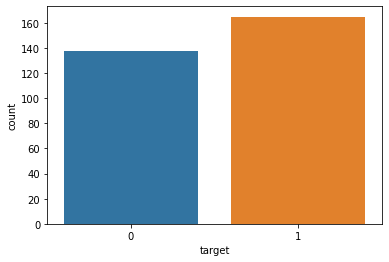

In [2]:
dataset = pd.read_csv("heart.csv")
type(dataset)
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [3]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

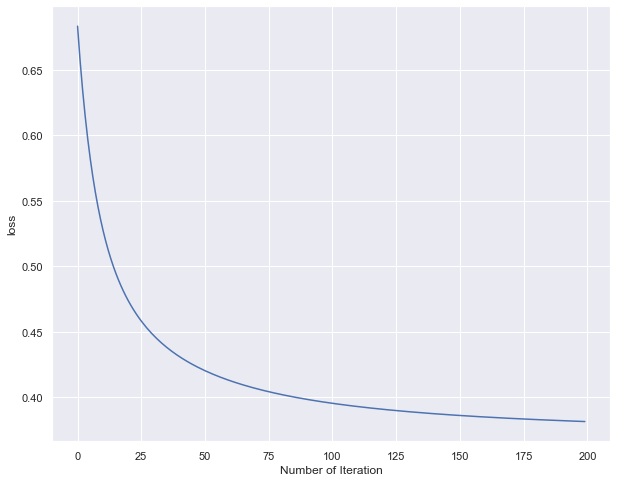

Test Accuracy of Logistic regression from scratch: 90.16%
The accuracy score achieved using Logistic Regression model from sklearn is: 88.52 %


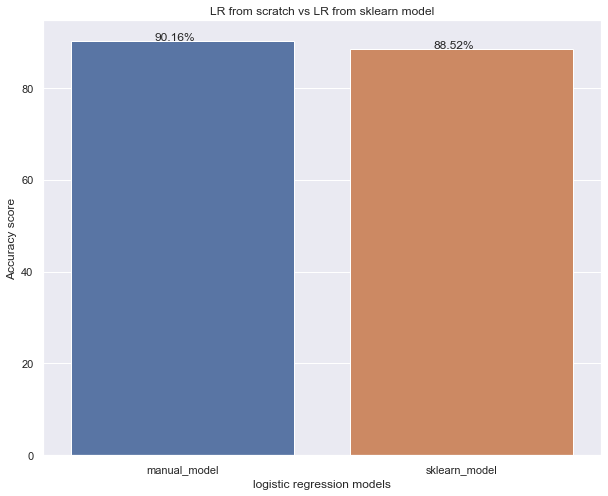

In [132]:
from sklearn.metrics import accuracy_score


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Logestic Regression

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test.T) + bias
    y_calculated = sigmoid(z)

    y_prediction = np.zeros((1, x_test.shape[0]))

    for i in range(y_calculated.shape[1]):
        if y_calculated[0, i] < 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1

    return y_prediction

def LR_train(weights, bias, x_train, y_train, learning_Rate, epochs):
    
    loss_list = []
    epoch_list = []

    for i in range(epochs):
        # forward
        y_calculated = sigmoid(np.dot(weights.T, x_train.T) + bias)
        
        lw = -(y_train * np.log(y_calculated) + (1 - y_train) * np.log(1 - y_calculated))
        """print("i= ", i)
        print("sum = ",np.sum(lw))"""
        
        loss = np.sum(lw) / x_train.shape[0]

        # Backward
        MLE_update = np.dot(x_train.T, ((y_calculated - y_train.T).T)) / x_train.shape[0]
        
        weights = weights - learning_Rate * MLE_update

        loss_list.append(loss)
        epoch_list.append(i)
        
        x_train, y_train = shuffle(x_train, y_train)
        

    plt.plot(epoch_list, loss_list)
    plt.xlabel("Number of Iteration")
    plt.ylabel("loss")
    plt.show()

    return weights, bias

def logistic_regression(x_train, y_train, x_test, y_test, learningRate, epochs):
    # random weights [-0.05, 0.05] --> size = n_features (13)
    global score_manual
    weights = np.random.uniform(-0.05, 0.05, (x_train.shape[1], 1))
    
    bias = 0.0
    weights, bias = LR_train(weights, bias, x_train, y_train, learningRate, epochs)
    y_prediction = predict(weights, bias, x_test)
    
    print("Test Accuracy of Logistic regression from scratch: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test)) * 100) / 100 * 100))
    score_manual = round((100 - np.mean(np.abs(y_prediction - y_test)) * 100) / 100 * 100, 2)

score_manual = 0

# read data
data = pd.read_csv("heart.csv")

# store x and y values
y_true = data.target.values
x_data = data.drop(['target'], axis = 1)

# Normalize
x_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# split the data 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.20, random_state=4)


logistic_regression(x_train, y_train, x_test, y_test, learningRate=1, epochs=200)

# sklearn model
lr = LogisticRegression()
lr.fit(x_train,y_train)
Y_pred_lr = lr.predict(x_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression model from sklearn is: "+str(score_lr)+" %")

sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel("logistic regression models")
plt.ylabel("Accuracy score")
plt.title("LR from scratch vs LR from sklearn model")
models = ["manual_model", "sklearn_model"]
scores = [score_manual, score_lr]
ax=sns.barplot(models,scores)

i = 0
for p in ax.patches:
        #percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + 0.3
        y = p.get_y() + p.get_height() +0.1
        ax.annotate(str(scores[i])+"%", (x, y))
        i = i+1

plt.show()


In [77]:
# Naive Bayse

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [78]:
# SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(X_train,Y_train,epochs=300)

Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

Using TensorFlow backend.


Epoch 1/300
242/242 [==============================] - 0s 631us/step - loss: 20.5170 - accuracy: 0.4587
Epoch 2/300
242/242 [==============================] - 0s 49us/step - loss: 14.9287 - accuracy: 0.4587
Epoch 3/300
242/242 [==============================] - 0s 153us/step - loss: 9.1793 - accuracy: 0.4587
Epoch 4/300
242/242 [==============================] - 0s 91us/step - loss: 3.4604 - accuracy: 0.4587
Epoch 5/300
242/242 [==============================] - 0s 62us/step - loss: 1.3749 - accuracy: 0.5702
Epoch 6/300
242/242 [==============================] - 0s 103us/step - loss: 1.7458 - accuracy: 0.5455
Epoch 7/300
242/242 [==============================] - 0s 132us/step - loss: 0.9181 - accuracy: 0.5248
Epoch 8/300
242/242 [==============================] - 0s 87us/step - loss: 0.8914 - accuracy: 0.5289
Epoch 9/300
242/242 [==============================] - 0s 132us/step - loss: 0.7665 - accuracy: 0.5992
Epoch 10/300
242/242 [==============================] - 0s 99us/step - loss

In [79]:
scores = [score_manual,score_nb,score_svm,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 90.16 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Neural Network is: 80.33 %


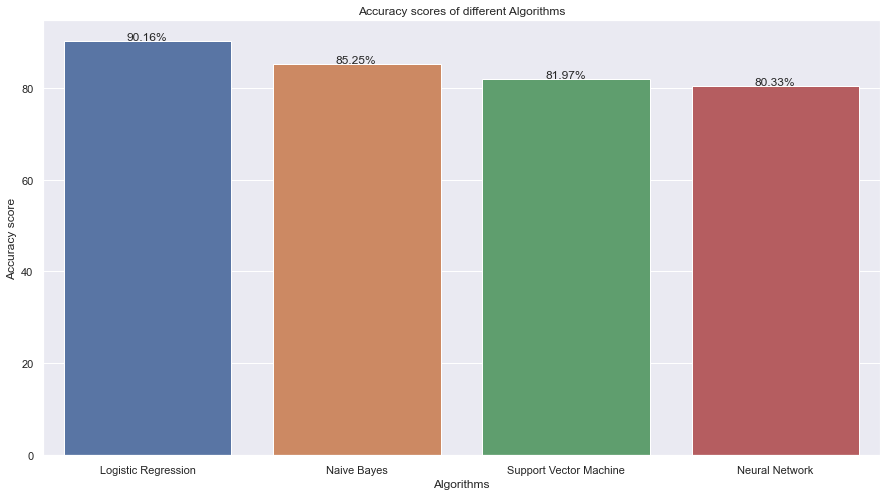

In [126]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores of different Algorithms")

ax = sns.barplot(algorithms,scores)


i = 0
for p in ax.patches:
        #percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + 0.3
        y = p.get_y() + p.get_height() + 0.2
        ax.annotate(str(scores[i])+"%", (x, y))
        i = i+1

plt.show()
